# Segmentation using FASTAI

* Creating a model that can recognize the content of every individual pixel in an image is called segmentation. Here is how we can train a segmentation model with fastai, using a subset of the Camvid dataset

In [1]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.028718,2.595111,01:03


epoch,train_loss,valid_loss,time
0,1.683871,1.525629,01:07
1,1.456808,1.210309,01:05
2,1.305256,1.027544,01:05
3,1.195080,0.974461,01:05
4,1.108388,0.819881,01:06
5,1.011868,0.762104,01:05
6,0.929502,0.733339,01:07
7,0.861192,0.734716,01:07


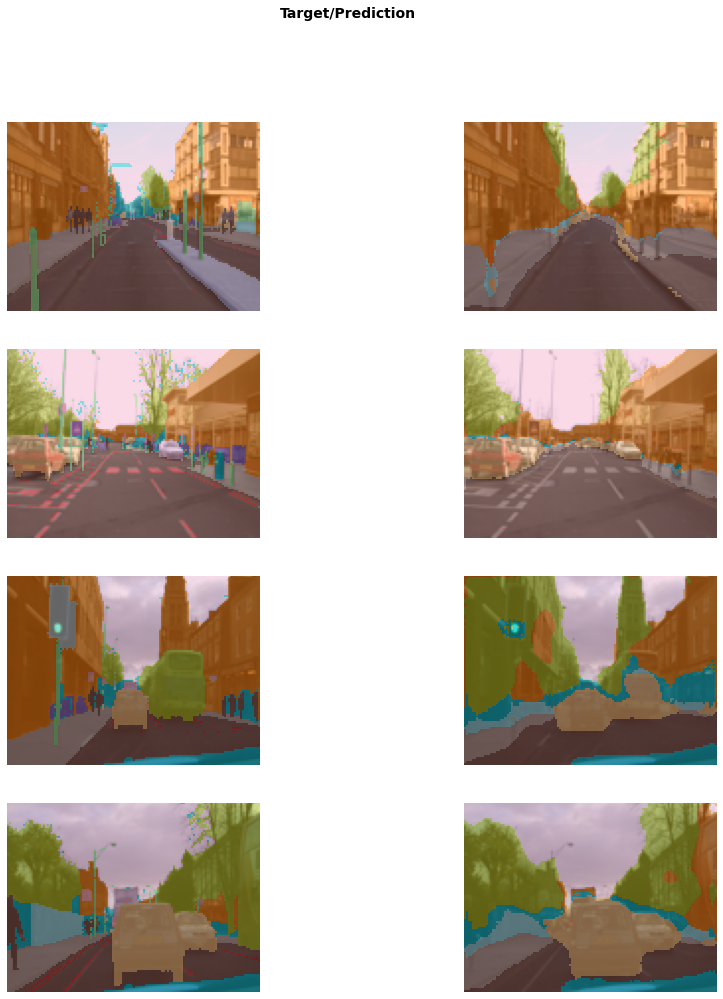

In [5]:
learn.show_results(max_n=4, figsize=(15,16))

We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image. As you can see, it nearly perfectly classifies every pixel in every object. For instance, notice that all of the cars are overlaid with the same color and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label and the right is the prediction from the model).